## Load necessary modules & all datasets

In [1]:
import os
import numpy as np
import cv2
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load all datasets in numpy array format 
def removeTmpFiles(path):
    # automatically remove all .DS_Store files
    if path.split("/")[-1] == '.DS_Store': os.remove(path)
    elif os.path.isdir(path):
        for filename in os.listdir(path): removeTmpFiles(path + "/" + filename)

data_dir = "data/final_output_data/"
data_train, data_val, data_test = [], [], []
labels_train, labels_val, labels_test = [], [], []

data = {'train': data_train,
        'val': data_val,
        'test': data_test}
labels = {'train': labels_train,
          'val': labels_val,
          'test': labels_test}

dataset_types = ['train', 'val', 'test']
for t in dataset_types:
    curr_data_dir = data_dir+t
    removeTmpFiles(curr_data_dir) # for macOS
    for folder_name in os.listdir(curr_data_dir):
        folder_path_class = os.path.join(curr_data_dir, folder_name)
        label = folder_name
        for image_path in os.listdir(folder_path_class):
            image_path_full = os.path.join(folder_path_class, image_path)
            image = cv2.imread(image_path_full)
            image = cv2.resize(image, (240, 240))
            image = image.flatten()
            data[t].append(image)
            labels[t].append(label)
    data[t] = np.array(data[t], dtype=object)
    labels[t] = np.array(labels[t], dtype=object)

## Support Vector Machine

In [3]:
# SVM with cross-validation (# TODO: it's unused?)
def SVC_crossval(X_train, y_train, kernels, C_vals):
    kf = KFold(n_splits=3)
    best_acc, best_kernel, best_c_val, mean_acc = -1, -1, -1, -1
    for i in kernels:
        for j in C_vals:
            model = SVC(kernel=i, C=j)
            acc_folds = []
            for (train_idx, val_idx) in kf.split(X=X_train, y=y_train):
                X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
                y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
                model.fit(X_fold_train, y_fold_train)
                preds = model.predict(X_fold_val)
                acc = sum([preds == y_fold_val])/len(y_fold_val)
                acc_folds.append(acc)
            mean_acc = np.mean(acc_folds)
            if mean_acc > best_acc:
                best_acc = mean_acc
                best_c_val = j
                best_kernel = i
    return best_kernel, best_c_val, mean_acc

In [4]:
def test_SVC_model(kernel, C_val, X_train, y_train, X_test):
    model = SVC(kernel=kernel, C=C_val)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

In [5]:
y_pred_SVM = test_SVC_model('rbf',10, data['train'], labels['train'], data['test'])
print("Classfication report for SVM:")
print(classification_report(labels['test'], y_pred_SVM, target_names=['artificial', 'human']))

Classfication report for SVM:
              precision    recall  f1-score   support

  artificial       0.64      0.94      0.76        51
       human       0.89      0.48      0.62        52

    accuracy                           0.71       103
   macro avg       0.77      0.71      0.69       103
weighted avg       0.77      0.71      0.69       103



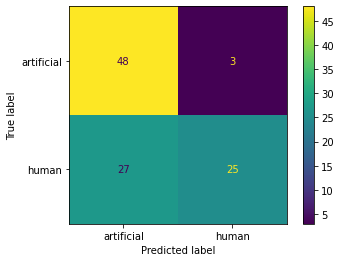

In [6]:
conf_mat = confusion_matrix(labels['test'], y_pred_SVM)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['artificial', 'human'])
disp.plot()
plt.show()

## K-nearest-neighbor

In [7]:
def KNN(X_train, y_train, X_test):
    knn_model = KNeighborsClassifier(n_neighbors=1)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    return y_pred

In [8]:
y_pred_KNN = KNN(data['train'], labels['train'], data['test'])
print("Classfication report for k-nearest-neighbors:")
print(classification_report(labels['test'], y_pred_KNN, target_names=['artificial', 'human']))

Classfication report for k-nearest-neighbors:
              precision    recall  f1-score   support

  artificial       0.70      0.41      0.52        51
       human       0.59      0.83      0.69        52

    accuracy                           0.62       103
   macro avg       0.64      0.62      0.60       103
weighted avg       0.64      0.62      0.60       103



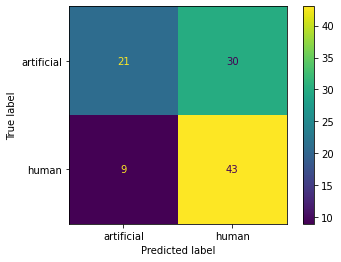

In [9]:
conf_mat = confusion_matrix(labels['test'], y_pred_KNN)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['artificial', 'human'])
disp.plot()
plt.show()

## Decision Tree

In [10]:
def tree_model(X_train, y_train, X_test):
    dtree_model = DecisionTreeClassifier(random_state=540)
    dtree_model.fit(X_train, y_train)
    y_pred = dtree_model.predict(X_test)
    return y_pred 

In [11]:
y_pred_decision_tree = tree_model(data['train'], labels['train'], data['test'])
print("Classfication report for decision tree model:")
print(classification_report(labels['test'], y_pred_decision_tree, target_names=['artificial', 'human']))

Classfication report for decision tree model:
              precision    recall  f1-score   support

  artificial       0.59      0.84      0.69        51
       human       0.73      0.42      0.54        52

    accuracy                           0.63       103
   macro avg       0.66      0.63      0.62       103
weighted avg       0.66      0.63      0.61       103



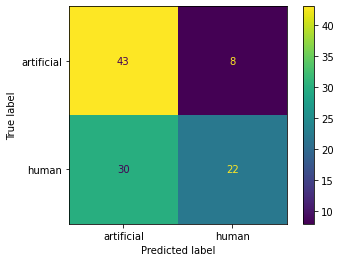

In [12]:
conf_mat = confusion_matrix(labels['test'], y_pred_decision_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['artificial', 'human'])
disp.plot()
plt.show()

## Random Forest

In [16]:
def random_forest_model(X_train, y_train, X_test):    
    rf = RandomForestClassifier(min_samples_leaf=10, max_features=10, random_state=540)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    return y_pred

In [17]:
y_pred_random_forest = random_forest_model(data['train'], labels['train'], data['test'])
print("Classfication report for random forest model:")
print(classification_report(labels['test'], y_pred_random_forest, target_names=['artificial', 'human']))

Classfication report for random forest model:
              precision    recall  f1-score   support

  artificial       0.72      0.94      0.81        51
       human       0.92      0.63      0.75        52

    accuracy                           0.79       103
   macro avg       0.82      0.79      0.78       103
weighted avg       0.82      0.79      0.78       103



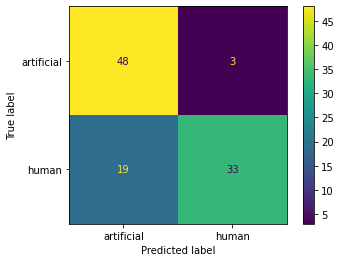

In [18]:
conf_mat = confusion_matrix(labels['test'], y_pred_random_forest)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['artificial', 'human'])
disp.plot()
plt.show()